In [188]:
import pymongo
from sklearn.preprocessing import StandardScaler
import datetime 
from collections import defaultdict
class Database(object):
    def __init__(self):
        self.connection = pymongo.MongoClient("localhost", 27017)
        self.db = self.connection["DSS4_SmallP"]
        self.mov = self.db["Movie_mojo"]
        self.act = self.db["actor"]
        self.dir = self.db['director']
        self.fra = self.db['franchise']
        
def get_score(name, idt, year):
    idt = idt.split('/')
    idt = datetime.date(int(idt[2])+2000, int(idt[0]), int(idt[1]))
    ytd = datetime.timedelta(days = 365*year)

    score = 0
    for mov in name :
  #      print(mov)
        if len(name[mov]) == 4 :
            if name[mov][2] != 'NA':
                mdt = name[mov][2].split('/')
                mdt = datetime.date(int(mdt[2])+2000, int(mdt[0]), int(mdt[1]))
                if idt - mdt < ytd and datetime.timedelta(0) < idt - mdt:
                    if name[mov][3] != 'NA' :
                        score += name[mov][3]
#    if score == 0 : score = 1
    return score

def get_score_avg(name, idt, year):
    idt = idt.split('/')
    idt = datetime.date(int(idt[2])+2000, int(idt[0]), int(idt[1]))
    ytd = datetime.timedelta(days = 365*year)
    count = 0.
    score = 0.
    for mov in name :
  #      print(mov)
        if len(name[mov]) == 4 :
            if name[mov][2] != 'NA':
                mdt = name[mov][2].split('/')
                mdt = datetime.date(int(mdt[2])+2000, int(mdt[0]), int(mdt[1]))
                if idt - mdt < ytd and datetime.timedelta(0) < idt - mdt:
                    if name[mov][3] != 'NA' :
                        count += 1.
                        score += name[mov][3]
    return score / count


db = Database()

In [189]:
dict_act = {}
actors = db.act.find()
for act in actors:
    dict_act[act['name']] = act['movie']
dict_dir = {}
directors = db.dir.find()
for dire in directors:
    dict_dir[dire['name']] = dire['movie']
dict_fra = {}
franchise = db.fra.find()
for fra in franchise:
    dict_fra[fra['name']] = fra['movie']

In [154]:
db.db['actor'].find()

In [173]:
test = ['한국']
'한국' in test

True

In [190]:
#arr_col = ['Mname','nation','project_budget','genre','grade','release_kor','viewing_time','year']
arr_col = ['Mname','director','franchise','release_kor','grade',
           'project_budget','actor','grade','release_kor','viewing_time',
           'year','genre','nation', 'gross_us', 'gross_kor']
movies = db.mov.find({'gross_us' : {'$exists' : 'True'}})
data = [] 
for n, line in enumerate(movies):
    movie = defaultdict(lambda: list())
    for key in arr_col :
        if (line[key] == 'NA') or (line[key] == -1):
            line[key] = np.nan
        movie[key] = line[key]
    if isinstance(movie['nation'], list) and u'한국' in movie['nation'] :
        pass
    else :
        score_act = 0
        score_dir = 0
        score_fra = 0
        for it in movie['actor']:
            score_act += get_score(dict_act[it], movie['release_kor'], 5)
        for it in movie['director']:
            score_dir += get_score(dict_dir[it], movie['release_kor'], 5)
        for it in movie['franchise']:
            score_fra += get_score(dict_fra[it], movie['release_kor'], 5)
        movie['score_act'] = score_act
        movie['score_dir'] = score_dir
        movie['score_fra'] = score_fra
        data.append(movie)
df = pd.DataFrame(data)

In [191]:
dfn = df.ix[df['nation'].dropna().index]
dfn = dfn.fillna(1)
dfn = dfn.reset_index(drop = 1)

In [192]:
season_dum = pd.DataFrame(np.zeros((len(dfn), 5)),columns = ['sp_d','su_d','au_d','wi_d','season'])
for i, mon in enumerate(dfn.release_kor):
    mon = int(mon.split('/')[0])
    if 3 <= mon < 6 :
        season_dum.ix[i, 0] = 1
        season_dum.ix[i, 4] = 0
    elif 6 <= mon < 9 :
        season_dum.ix[i, 1] = 1
        season_dum.ix[i, 4] = 1
    elif 9 <= mon < 12 :
        season_dum.ix[i, 2] = 1
        season_dum.ix[i, 4] = 2
    else :
        season_dum.ix[i, 3] = 1
        season_dum.ix[i, 4] = 3
dfn = dfn.join(season_dum)

In [198]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)

height has been deprecated.



In [202]:
df.sort('gross_kor',ascending=False)[df['score_act']==0]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Mname,actor,director,franchise,genre,grade,gross_kor,gross_us,nation,project_budget,release_kor,score_act,score_dir,score_fra,viewing_time,year
55,The Admiral: Roaring Currents,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,131556156.0,2589811.0,NaN,NaN,7/30/14,0,0,0,NaN,2014
858,Spirits' Homecoming,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,23724093.0,125616.0,NaN,NaN,2/24/16,0,0,0,NaN,2016
699,Twenty (2015),"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,21861512.0,136125.0,NaN,NaN,3/26/15,0,0,0,NaN,2015
27,The Maze Runner,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'Wes Ball': u'/people/chart/?view=Director&i...,{u'Series: Maze Runner': u'/franchises/chart/?...,"[미스터리, 액션, 스릴러, SF]",12세이상관람가,20377014.0,102427862.0,[미국],34000000.0,9/18/14,0,0,0,113.0,2014
138,Maze Runner: The Scorch Trials,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'Wes Ball': u'/people/chart/?view=Director&i...,{u'Series: Maze Runner': u'/franchises/chart/?...,"[액션, SF, 스릴러]",12세이상관람가,19066066.0,81697192.0,[미국],61000000.0,9/18/15,0,20377014,20377014,131.0,2015
710,Gangnam 1970,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,15863084.0,18022.0,NaN,NaN,1/21/15,0,0,0,NaN,2015
49,Into The Storm,{u'Jeremy Sumpter': u'/people/chart/?view=Acto...,{u'Steven Quale': u'/people/chart/?view=Direct...,{},"[액션, 스릴러]",12세이상관람가,15664268.0,47602194.0,[미국],50000000.0,8/28/14,0,2002365,0,89.0,2014
568,My Way (2012),"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,13700293.0,70177.0,NaN,NaN,12/22/11,0,0,0,NaN,2012
500,The Intouchables (U.S.-only),{u'Omar Sy': u'/people/chart/?view=Actor&id=om...,{u'People': u'/people/?ref=ft'},{},NaN,NaN,11092513.0,10198820.0,NaN,NaN,3/22/12,0,0,0,NaN,2012
706,The Phone,"{u'Genres': u'NA', u'People': u'/people/?ref=f...",{u'People': u'/people/?ref=ft'},{},NaN,NaN,10510802.0,40516.0,NaN,NaN,10/15/15,0,0,0,NaN,2015


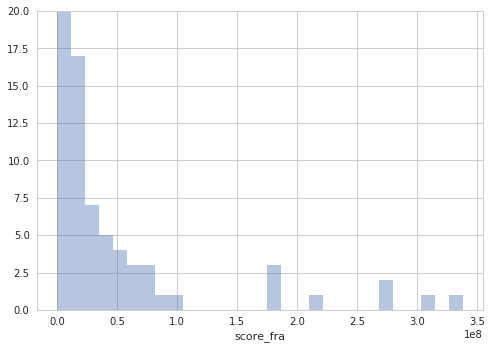

In [70]:
sns.distplot(dfn['score_fra'], kde = 0)
plt.ylim(0,20)
plt.show()

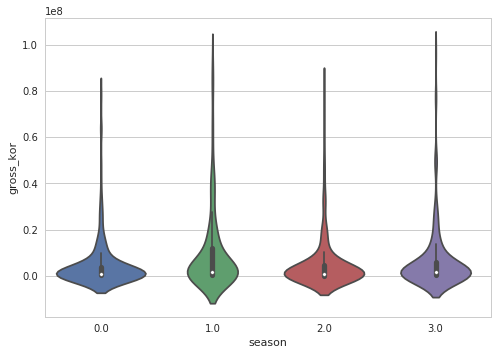

In [71]:
sns.violinplot(y = dfn['gross_kor'], x = dfn['season'])
plt.show()

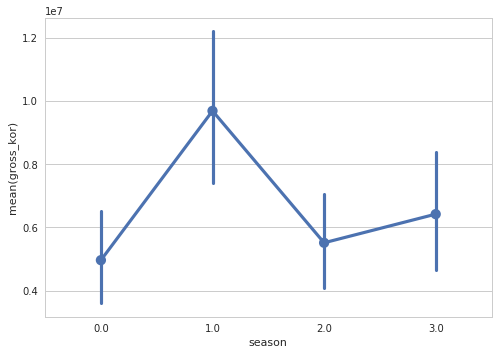

In [72]:
sns.pointplot(x="season", y="gross_kor",  data=dfn, dodge=True)
plt.show()

In [73]:
#장르 더미
genre = [u'\uac00\uc871',
 u'\uc2dc\ub300\uadf9',
 u'\uc2a4\ub9b4\ub7ec',
 u'\ub4dc\ub77c\ub9c8',
 u'\uc560\ub2c8\uba54\uc774\uc158',
 u'\uc804\uc7c1',
 u'\uc5b4\ub4dc\ubca4\ucc98',
 u'\uacf5\ud3ec',
 u'\ud310\ud0c0\uc9c0',
 u'\ubbf8\uc2a4\ud130\ub9ac',
 u'\ub2e4\ud050\uba58\ud130\ub9ac',
 u'\uc11c\ubd80',
 u'\ub85c\ub9e8\uc2a4/\uba5c\ub85c',
 u'\uc561\uc158',
 u'\ubc94\uc8c4',
 u'\ucf54\ubbf8\ub514',
 u'\ubb34\ud611',
 u'SF',
 u'\ubba4\uc9c0\uceec']
dummies = pd.DataFrame(np.zeros((len(dfn), len(genre))), columns=genre)
for i, gen in enumerate(dfn.genre):
    for j in gen:
        dummies.ix[i, j] = 1./len(gen)
gen = np.arange(len(genre))
dummies.columns = gen
dfn = dfn.join(dummies.add_prefix('Genre_'))

In [74]:
for n, i in enumerate(genre):
    print(i)

가족
시대극
스릴러
드라마
애니메이션
전쟁
어드벤처
공포
판타지
미스터리
다큐멘터리
서부
로맨스/멜로
액션
범죄
코미디
무협
SF
뮤지컬


In [75]:
#등급 더미
dfgrade = pd.get_dummies(dfn.grade)
del dfgrade[u'']
dfgrade.columns = [12,15,0,18]
dfn = dfn.join(dfgrade)

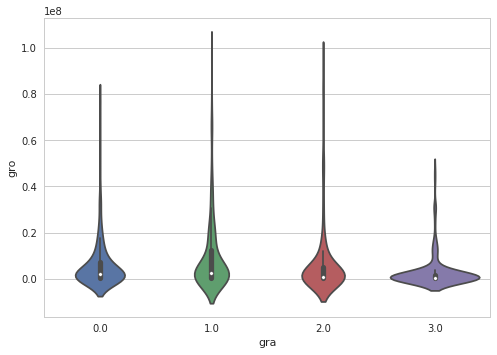

In [76]:
#등급 바이올린 플롯
grades = [u'전체관람가', u'12세이상관람가', u'15세이상관람가', u'청소년관람불가']
dfg2 = pd.DataFrame(np.zeros((len(dfn), 2)), columns=['gra', 'gro'])
for n, gra in enumerate(dfn.grade) :
    if gra != u'':
        idg = grades.index(gra)
        dfg2.ix[n, 'gra'] = idg
        dfg2.ix[n, 'gro'] = dfn.ix[n,'gross_kor']
sns.violinplot(y = dfg2['gro'], x = dfg2['gra'])
plt.show()

In [77]:
#장르 바이올린 플롯
dfgen = pd.DataFrame(np.zeros((len(dfn), 2)), columns=['genre','gross_kor'])
count = 0
for i, gen in enumerate(dfn.genre):
    for j in gen:
        sel = genre.index(j)
        dfgen.ix[count,'genre'] = sel
        dfgen.ix[count,'gross_kor'] = dfn.ix[i,'gross_kor']
        count += 1

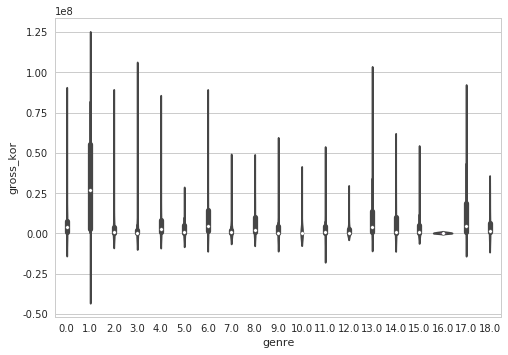

In [78]:
sns.violinplot(y = dfgen['gross_kor'], x = dfgen['genre'])
plt.show()

In [79]:
df_n0 = dfn[dfn['score_dir']!=0].reset_index(drop = 1)
df_n0 = df_n0[df_n0['score_act']!=0].reset_index(drop = 1)

In [118]:
dfx = pd.DataFrame(df_n0, columns= [ u'project_budget', u'score_act', u'score_dir', u'score_fra',
    u'Genre_0', u'Genre_1', u'Genre_2', u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6',
    u'Genre_7', u'Genre_8', u'Genre_9', u'Genre_10', u'Genre_11', u'Genre_12',
    u'Genre_13', u'Genre_14', u'Genre_15', u'Genre_16', u'Genre_17', u'Genre_18',
                                    'sp_d','su_d','au_d','wi_d',0,12,15,18])
dfy = pd.DataFrame(df_n0, columns = ['gross_kor'])

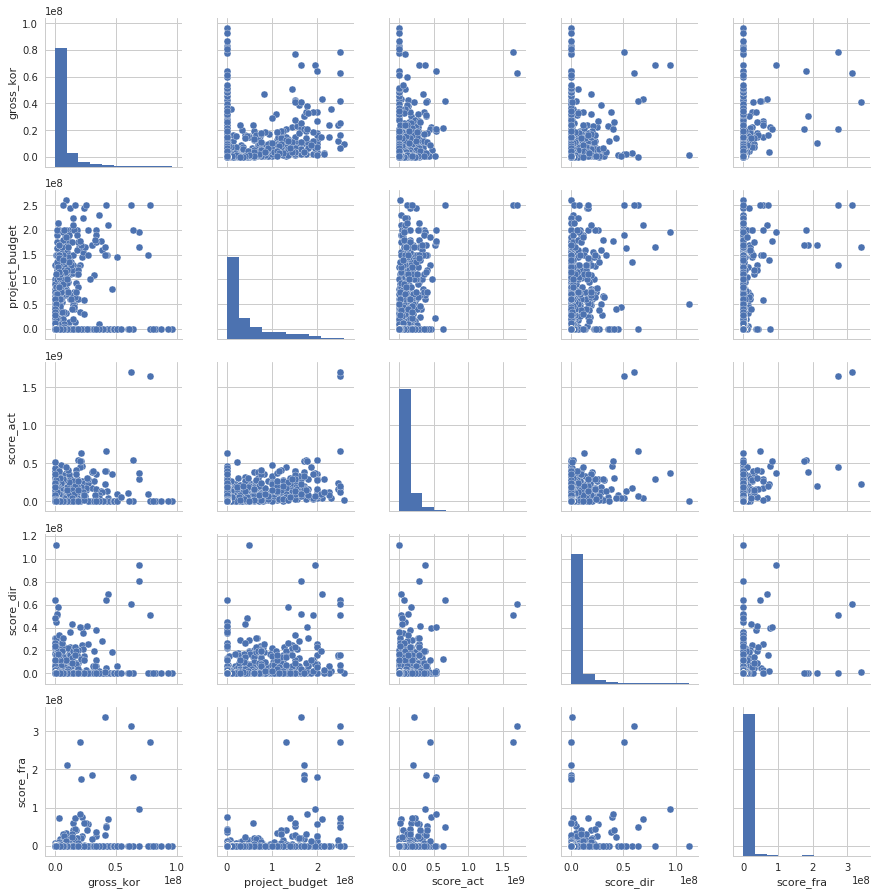

In [82]:
sns.pairplot(df_n0, vars=['gross_kor', 'project_budget', 'score_act', 'score_dir', 'score_fra'])
plt.show()

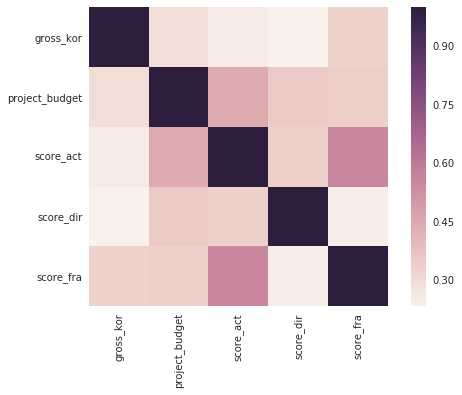

In [83]:
new_dfn = new_dfn = df_n0.ix[:,['gross_kor', 'project_budget', 'score_act', 'score_dir', 'score_fra']]
corrmat = new_dfn.corr()
sns.heatmap(corrmat,square=1)
plt.show()

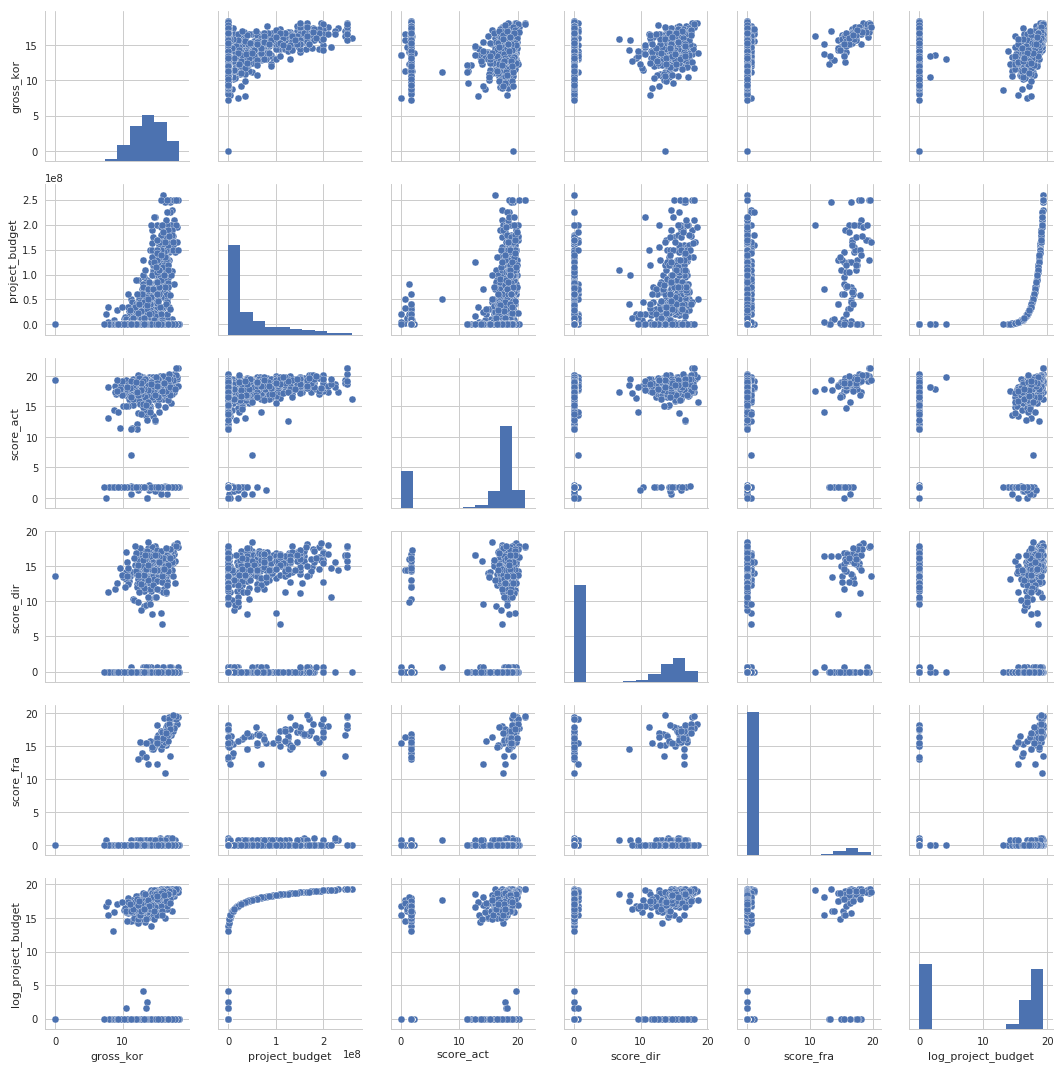

In [105]:
new_dfn = df_n0.ix[:,['gross_kor', 'project_budget', 'score_act', 'score_dir', 'score_fra']]
new_dfn['score_fra'] = np.log(new_dfn['score_fra'] + 1)
new_dfn['gross_kor'] = np.log(new_dfn['gross_kor'])
new_dfn['score_act'] = np.log(new_dfn['score_act'])
new_dfn['score_dir'] = np.log(new_dfn['score_dir'])
new_dfn['log_project_budget'] = np.log(new_dfn['project_budget'])
sns.pairplot(new_dfn)
plt.show()

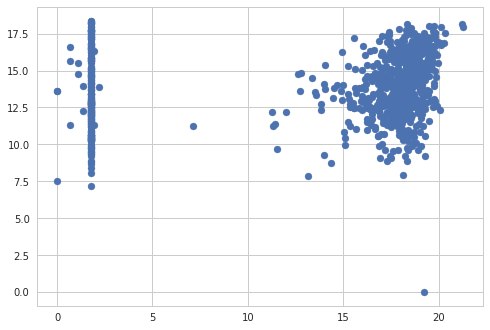

In [148]:
plt.scatter(y = 'gross_kor', x = 'score_act' ,data = new_dfn)
plt.show()

In [150]:
new_dfn['score_act']

0       1.791759
1      18.836958
2      17.875134
3      15.545554
4       1.791759
5      17.386172
6      19.950265
7      19.105993
8      18.883872
9      19.446173
10     19.693368
11     19.768464
12     19.000547
13     18.896663
14     19.500479
15     18.920404
16     19.409985
17     16.759241
18     17.967805
19     19.343031
20     12.631801
21     19.750394
22     19.127528
23     18.714656
24     17.511265
25     18.958664
26     19.191613
27      1.791759
28     16.378926
29     16.784477
         ...    
817    19.058244
818     1.791759
819    17.883266
820    17.473245
821     1.791759
822    15.081993
823     1.791759
824     1.791759
825     1.791759
826    18.031455
827    15.234591
828     1.791759
829    18.145729
830     1.791759
831    17.281837
832     1.791759
833     1.791759
834     1.791759
835     1.791759
836     1.791759
837     1.791759
838     1.791759
839     1.791759
840     1.791759
841     1.791759
842     1.791759
843    16.468448
844     1.7917

In [ ]:
plt.subplot(2,1,1)
plt.scatter(y = 'gross_kor', x = 'log_project_budget' ,data = new_dfn,)
plt.xlim(12.5,19.5)
plt.ylim(5,20)
plt.subplot(2,1,2)
plt.scatter(y = 'gross_kor', x = 'project_budget' ,data = new_dfn)
plt.show()

In [119]:
dfx = sm.add_constant(dfx, has_constant='add')
dfx.columns

Index([         u'const', u'project_budget',      u'score_act',
            u'score_dir',      u'score_fra',        u'Genre_0',
              u'Genre_1',        u'Genre_2',        u'Genre_3',
              u'Genre_4',        u'Genre_5',        u'Genre_6',
              u'Genre_7',        u'Genre_8',        u'Genre_9',
             u'Genre_10',       u'Genre_11',       u'Genre_12',
             u'Genre_13',       u'Genre_14',       u'Genre_15',
             u'Genre_16',       u'Genre_17',       u'Genre_18',
                 u'sp_d',           u'su_d',           u'au_d',
                 u'wi_d',                 0,                12,
                      15,                18],
      dtype='object')

In [93]:
tmp2 = dfx.copy()

In [110]:
dfx = tmp2.copy()

In [64]:
del dfx['score_fra']

In [120]:
model = sm.OLS( dfy['gross_kor'], dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     8.676
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           8.51e-32
Time:                        10:38:34   Log-Likelihood:                -14996.
No. Observations:                 847   AIC:                         3.005e+04
Df Residuals:                     817   BIC:                         3.019e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            4.13e+05   3.25e+06      0.

In [121]:
#로그변환
dfx['project_budget'] = np.log(dfx['project_budget'])
dfx['score_act'] = np.log(dfx['score_act'])
dfx['score_dir'] = np.log(dfx['score_dir'])
dfy = np.log(dfy)
#del dfx['project_budget']
#del dfx['score_act']
#del dfx['score_dir']
#sns.pairplot(dfx.join(dfy), vars=['project_budget', 'score_act', 'score_dir','gross_kor'])
#plt.show()

In [122]:
model = sm.OLS( dfy, dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     14.89
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           3.40e-57
Time:                        10:38:37   Log-Likelihood:                -1716.4
No. Observations:                 847   AIC:                             3493.
Df Residuals:                     817   BIC:                             3635.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              9.0710      0.513     17.

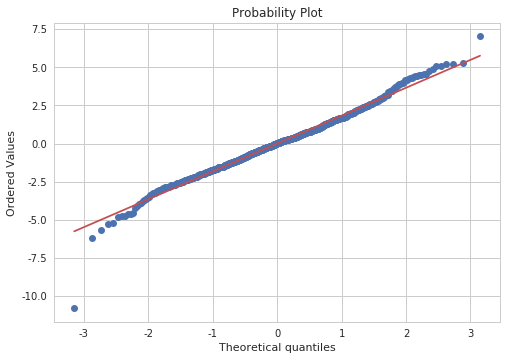

In [123]:
#아웃라이어
plt.figure()
sp.stats.probplot(result.resid, plot = plt)
plt.show()

In [124]:
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(dfx)-2)
idx = np.where(cooks_d2 < fox_cr)[0]
dfx2 = dfx.reset_index(drop = 1).ix[idx,:]
dfy2 = dfy.reset_index(drop = 1).ix[idx, :]

In [125]:
model2 = sm.OLS(dfy2['gross_kor'], dfx2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     18.15
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.42e-68
Time:                        10:38:45   Log-Likelihood:                -1546.1
No. Observations:                 807   AIC:                             3152.
Df Residuals:                     777   BIC:                             3293.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              9.7768      0.774     12.

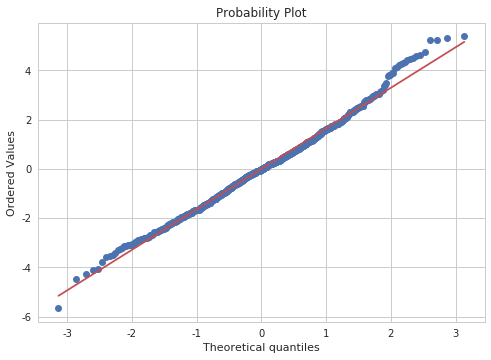

In [126]:
plt.figure()
sp.stats.probplot(result2.resid, plot = plt)
plt.show()

In [143]:
#스케일링
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(dfx2.ix[:, 1:5]), columns=dfx2.columns[1:5])
dfy3 = pd.DataFrame(scaler.fit_transform(dfy2), columns=dfy2.columns)

In [144]:
df3 = df3.join(dfx2.reset_index(drop=1).ix[:,5:])
#df3 = sm.add_constant(df3,has_constant='add')

In [145]:
model3 = sm.OLS(dfy3.reset_index(drop = 1), df3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     18.15
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.42e-68
Time:                        10:41:12   Log-Likelihood:                -936.41
No. Observations:                 807   AIC:                             1933.
Df Residuals:                     777   BIC:                             2074.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
project_budget     0.2237      0.035      6.

In [74]:
tmp3 = df3.copy()

In [78]:
df3 = tmp3.copy()

In [146]:
#변수선택
del df3['Genre_0']
del df3['Genre_2']
del df3['Genre_4']
del df3['Genre_5']
del df3['Genre_7']
del df3['Genre_8']
del df3['Genre_9']
del df3['Genre_11']
del df3['Genre_12']
del df3['Genre_14']
del df3['Genre_17']
del df3['Genre_18']
del df3['Genre_16']
del df3['sp_d']
del df3['su_d']
del df3['au_d']
del df3['wi_d']
del df3[0]
del df3[12]
del df3[15]
del df3[18]
#del df3['score_dir']
#del df3['score_act']


In [147]:
model3 = sm.OLS(dfy3.reset_index(drop = 1), df3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.02e-68
Time:                        10:42:53   Log-Likelihood:                -969.71
No. Observations:                 807   AIC:                             1959.
Df Residuals:                     797   BIC:                             2006.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
project_budget     0.2477      0.035      7.

In [81]:
dfx = pd.DataFrame(df_n0, columns= [ u'project_budget', u'score_act', u'score_dir', u'score_fra',
    u'Genre_0', u'Genre_1', u'Genre_2', u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6',
    u'Genre_7', u'Genre_8', u'Genre_9', u'Genre_10', u'Genre_11', u'Genre_12',
    u'Genre_13', u'Genre_14', u'Genre_15', u'Genre_16', u'Genre_17', u'Genre_18',
                                    'sp_d','su_d','au_d','wi_d',0,12,15,18])
dfy = pd.DataFrame(df_n0, columns = ['gross_kor'])

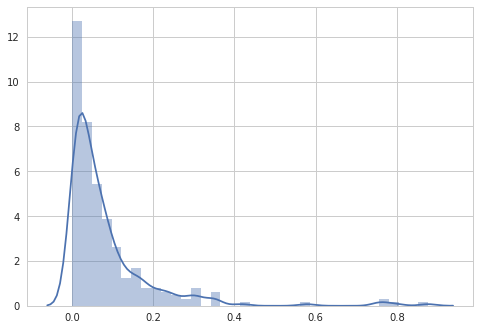

In [82]:
#Y값을 제작비 대비 매출로.
dfy_r = pd.DataFrame(dfy['gross_kor'] / dfx['project_budget'], columns=['ratio'])
del dfx['project_budget']
sns.distplot(dfy_r)
plt.show()

In [83]:
dfy_r = dfy_r.dropna()

In [84]:
model3 = sm.OLS(dfy_r, dfx)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.609
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           9.33e-05
Time:                        16:17:37   Log-Likelihood:                 212.41
No. Observations:                 265   AIC:                            -372.8
Df Residuals:                     239   BIC:                            -279.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
score_act   6.045e-11   5.69e-11      1.062      0.2

In [85]:
#로그변환
#dfx['log_bud'] = np.log(dfx['project_budget'])
dfx['score_act'] = np.log(dfx['score_act'])
dfx['score_dir'] = np.log(dfx['score_dir'])
dfx['score_fra'] = np.log(dfx['score_fra']+0.1)
dfy_r = np.log(dfy_r)
#del dfx['project_budget']
#del dfx['score_act']
#del dfx['score_dir']
#sns.pairplot(dfx.join(dfy_r), vars=['score_act', 'score_dir','ratio'])
#plt.show()

In [86]:
model3 = sm.OLS(dfy_r, dfx)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2.873
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           1.62e-05
Time:                        16:17:51   Log-Likelihood:                -411.40
No. Observations:                 265   AIC:                             874.8
Df Residuals:                     239   BIC:                             967.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
score_act      0.0370      0.074      0.501      0.6

In [88]:
tmp = dfx.copy()

In [91]:
#del dfx['score_fra']
del dfx['Genre_0']
del dfx['Genre_1']
del dfx['Genre_6']
del dfx['Genre_7']
del dfx['Genre_9']
del dfx['Genre_10']
del dfx['Genre_12']
del dfx['Genre_14']
del dfx['Genre_16']
del dfx[0]
del dfx[12]
del dfx[15]
del dfx[18]
del dfx['Genre_4']
del dfx['Genre_5']
del dfx['Genre_8']
del dfx['Genre_13']
del dfx['Genre_18']
del dfx['sp_d']
del dfx['au_d']

In [93]:
dfx2 = pd.DataFrame(scaler.fit_transform(dfx), columns=dfx.columns)
dfy2 = pd.DataFrame(scaler.fit_transform(dfy), columns=dfy.columns)
#dfx2 = dfx2.join(dfx.reset_index(drop=1).ix[:,3:])

In [94]:
model3 = sm.OLS(dfy2, dfx2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              gross_kor   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     11.97
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           6.56e-17
Time:                        16:21:53   Log-Likelihood:                -325.04
No. Observations:                 265   AIC:                             670.1
Df Residuals:                     255   BIC:                             705.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
score_act      0.2185      0.055      3.943      0.0